In [3]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor)_validation import ShuffleSplit
from sklearn.cross_validation import KFold
%matplotlib inline
%run -i ../../tools/label_encoder.py

# Biology

### DecisionTreeRegressor

In [4]:
def MAD(Y, YP): #MAE - MEAN ABSOLUTE ERROR FOR ME
    """Returns the mean loss"""
    m = np.mean(abs(Y-YP))
    return m

In [6]:
def plot_predictions_KF(Model, target, X, Y, kf): #PERFECT FUNCTION - DECIDED IF LET IT GET THE SCORES OR NOT
    """Required the Model/Estimator
    The target
    X is the predictive features
    Y is the data that contains all the TARGETS
    and kf is the object of Kfolds
    Returns the Mean Score and the Plots(of each KFold) with the individual score"""
    plot_rows = int(np.ceil(len(kf)/3)) #Number of rows to plot
    fig, axes = plt.subplots(plot_rows, 3, sharex=False, figsize=(14, plot_rows*4))
    axs = [i for i in axes.flatten()]
    sc = []
    j = 0
    for n, i in (kf):
        ax = axs[j]
        Model.fit(X.iloc[n], Y[target].iloc[n])
        Y_pred = Model.predict(X.iloc[i])
        ##################PRUEBA, QUITANDO LOS OUTLIERS EXAGERADOS###############
        ind = (Y_pred > 0) & (Y_pred < 100)
        Y_pred2 = Y_pred[ind] 
        score = MAD(Y[target].iloc[ind], Y_pred2) #HERE THE MAE IS CALCULATED
        ########################################################################
        ax.plot(Y[target].iloc[i], Y_pred, 'go', label='Prediction')
        #ax.plot(Y[target].iloc[i], Y[target].iloc[i]) #RECTA DE REGRESION PERFECTA
        ax.set_title('Fold: '+str(j)+'. Score: '+str(score))
        ax.set_xlabel('Real_Value')
        ax.set_ylabel('Prediction')
        ax.legend()
        j += 1
        sc.append(score)
        ax.grid()
    print('Mean Score:', np.mean(sc))
    plt.tight_layout(h_pad=2)

In [7]:
def get_exp_prediction(estimator, exp, S_Data, target, folds, KFShuffle = False, shuffle_split = False):
    """Required the estimator
    The exponent
    The sorted data by values of the target to predict
    The column(target) that will be analyzed
    The number of folds that will be created
    KFShuffle if True the Kfolds shuffle the data before split it
    shuffle_split if True the function DON'T use Kfolds, instead use a ShuffleSplit object
    And return the score of the model, and the plot of the prediction"""
    y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
    X_list = S_Data.columns.difference(y_list)
    New_X = S_Data.filter(items = X_list)
    exped_X = New_X**exp
    Y_train = S_Data.filter(items = y_list)
    
    if shuffle_split == True:
        kf = ShuffleSplit(n = exped_X.shape[0], n_iter=5, test_size=(100/(folds*100)))
    else:
        kf = KFold(exped_X.shape[0], n_folds=folds, shuffle = KFShuffle)
    print('The Model with the Data raised to the power of', exp, 'gives:')
    plot_predictions_KF(estimator, target, exped_X, Y_train, kf)

In [8]:
def get_Poly_prediction(estimator, deg, D_sorted, target, folds, KFShuffle = False, shuffle_split = False):
    """Required the degree to the PolynomialFeature object and the sorted data by values of the target,
    return the score of the model, statistics and the plots of the prediction"""
    start_time = time()
    y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
    X_list = D_sorted.columns.difference(y_list)
    New_X = D_sorted.filter(items = X_list)
    Y_train = D_sorted.filter(items = y_list)
    
    Poly = PolynomialFeatures(degree = deg)
    Poly_X = Poly.fit_transform(New_X)
    Poly_X = pd.DataFrame(Poly_X)
    
    if shuffle_split == True:
        kf = ShuffleSplit(n = Poly_X.shape[0], n_iter=5, test_size=(100/(folds*100)))
    else:
        kf = KFold(Poly_X.shape[0], n_folds=folds, shuffle = KFShuffle)
    
    print('The Model with the new "PolyData" with degree', deg, 'gives:')
    plot_predictions_KF(estimator, target, Poly_X, Y_train, kf)
    print('The prediction took:', time()-start_time, 'seconds')

In [9]:
data_2000 = pd.read_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_1.csv', delimiter=';')

In [11]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = data_2000.columns.difference(y_list)
S_data = data_2000.sort_values(by='PUNT_BIOLOGIA')
X = S_data.filter(items = X_list)
Y = S_data.filter(items = y_list)

Mean Score: 8.56373958951


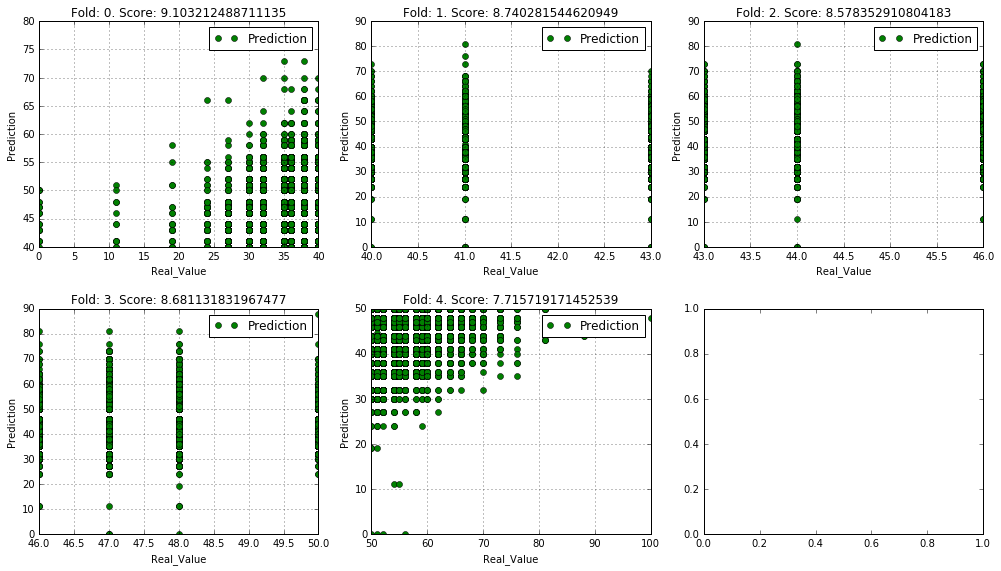

In [13]:
tree = DecisionTreeRegressor()
kf = KFold(X.shape[0], n_folds=5)
plot_predictions_KF(tree, 'PUNT_BIOLOGIA', X, Y, kf)

Mean Score: 8.94385641786
elapsed_time: 16.116985321044922


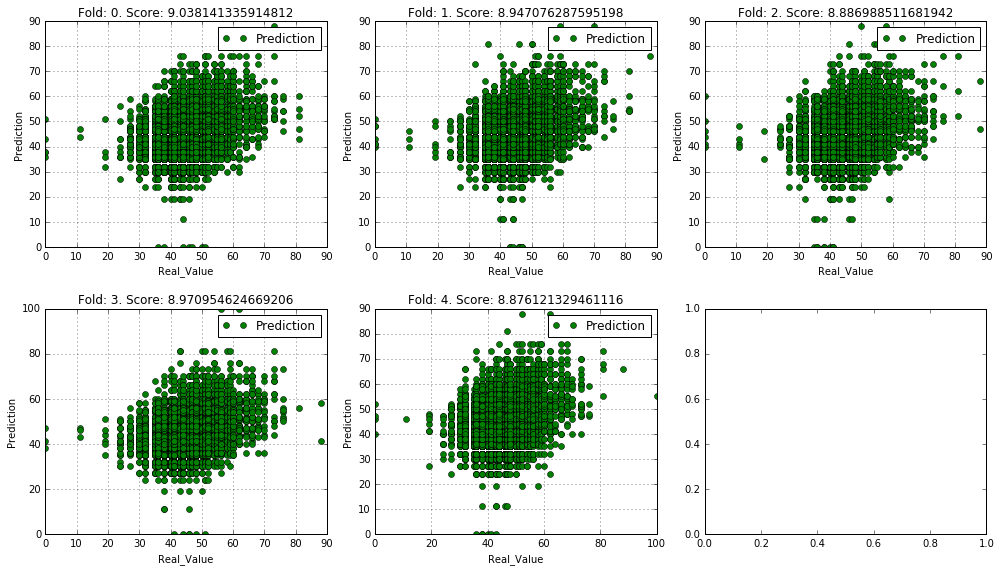

In [14]:
tree = DecisionTreeRegressor()
kf = KFold(X.shape[0], n_folds=5, shuffle = True)
plot_predictions_KF(tree, 'PUNT_BIOLOGIA', X, Y, kf)

Mean Score: 9.04934723808


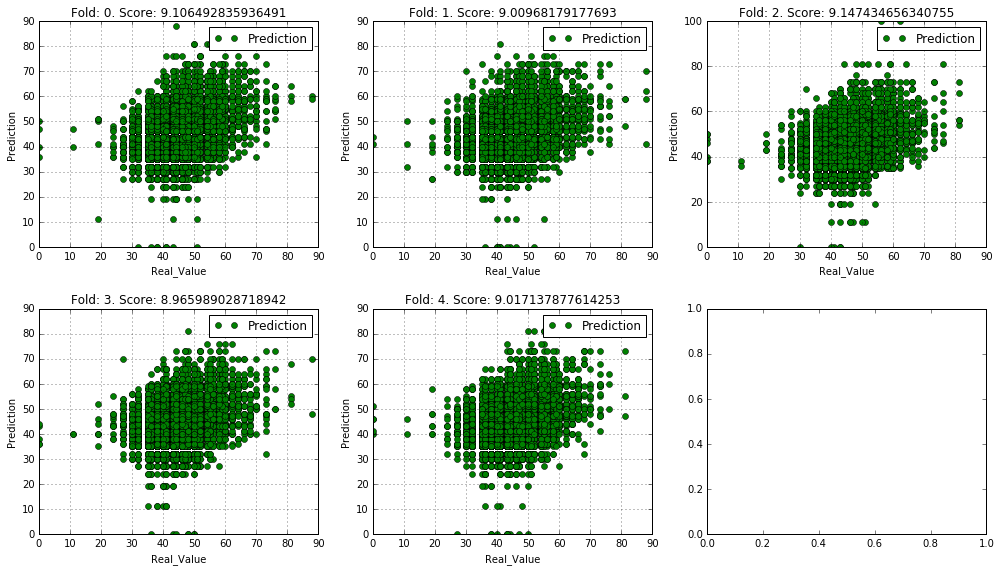

In [15]:
tree = DecisionTreeRegressor()
rs = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2)
plot_predictions_KF(tree, 'PUNT_BIOLOGIA', X, Y, rs)

#### POLYNOMIAL
exp = 2

The Model with the Data raised to the power of 2 gives:
Mean Score: 8.57868097433


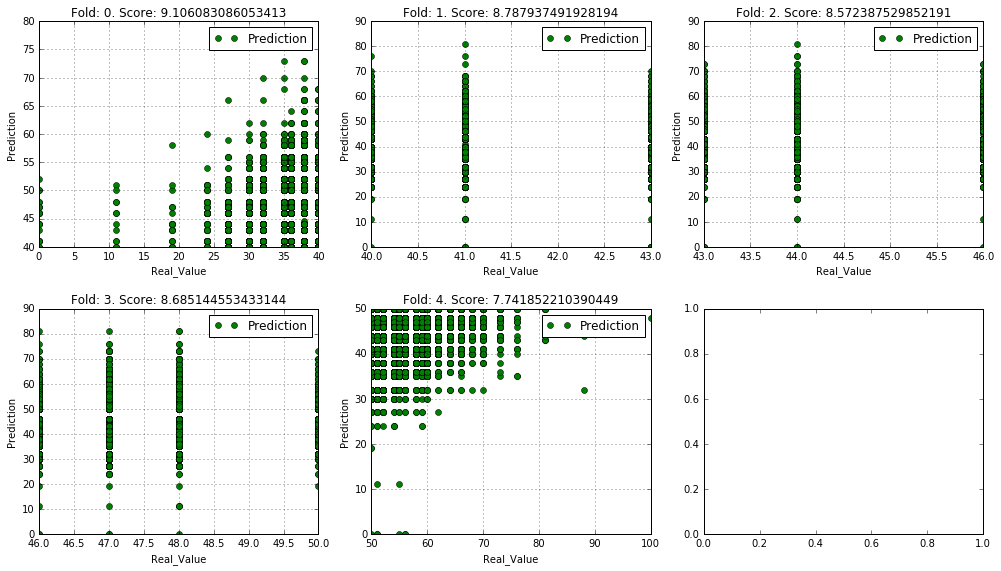

In [16]:
tree = DecisionTreeRegressor()
get_exp_prediction(tree, 2, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the Data raised to the power of 2 gives:
Mean Score: 8.94129396872


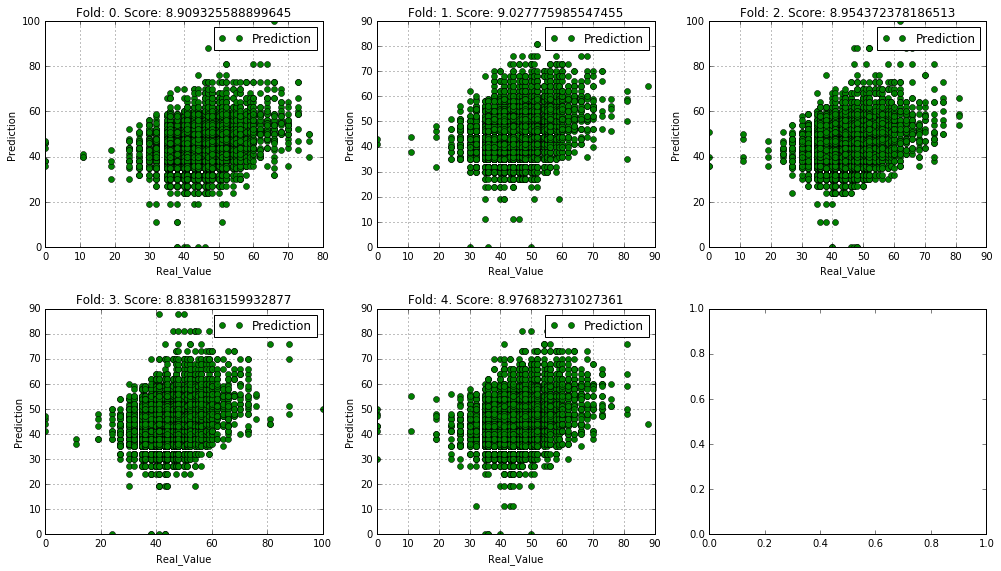

In [18]:
tree = DecisionTreeRegressor()
get_exp_prediction(tree, 2, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle=True)

The Model with the Data raised to the power of 2 gives:
Mean Score: 9.05906062979


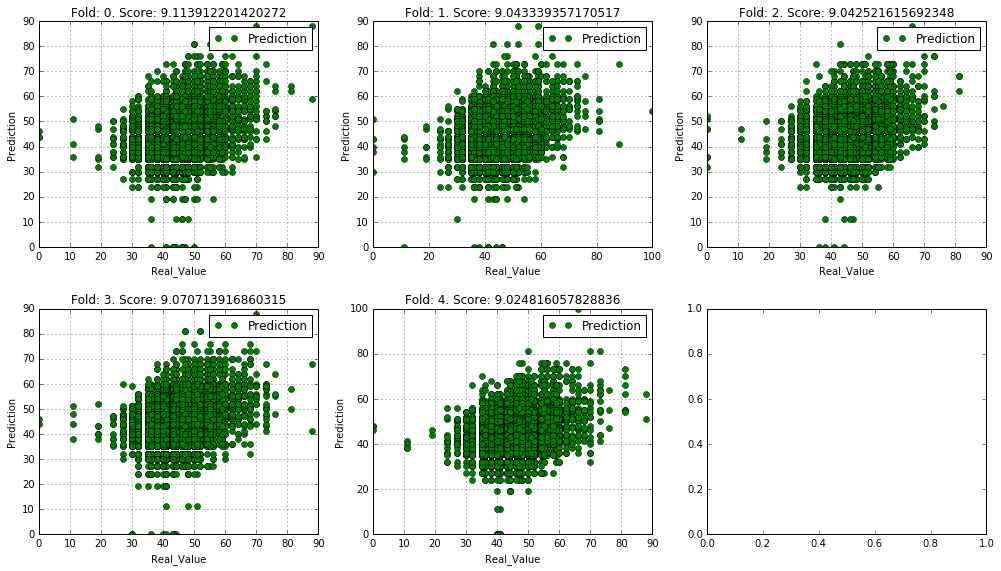

In [19]:
tree = DecisionTreeRegressor()
get_exp_prediction(tree, 2, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split=True)

Con exp 3

The Model with the Data raised to the power of 3 gives:
Mean Score: 8.56550866731


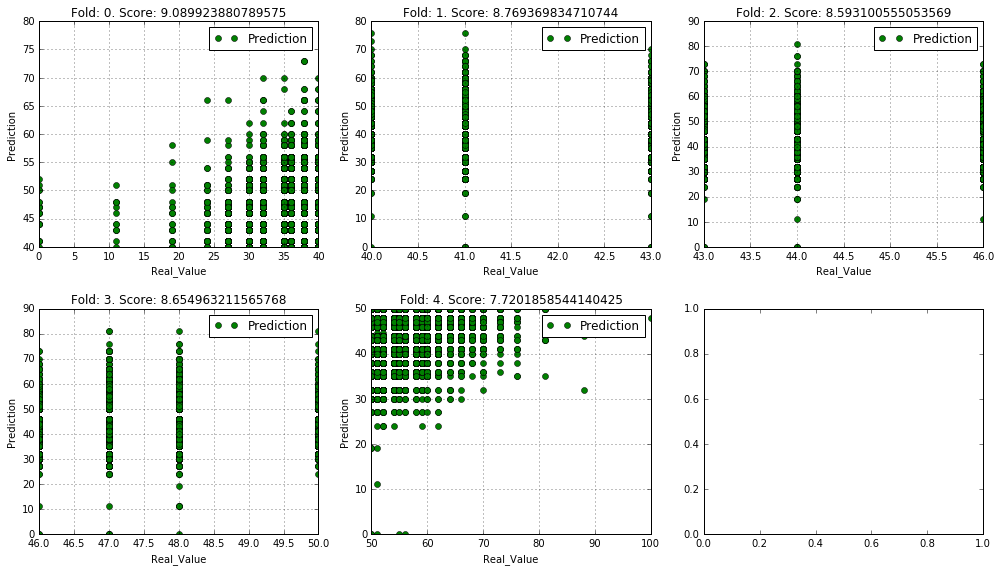

In [17]:
tree = DecisionTreeRegressor()
get_exp_prediction(tree, 3, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the Data raised to the power of 3 gives:
Mean Score: 9.02086216663


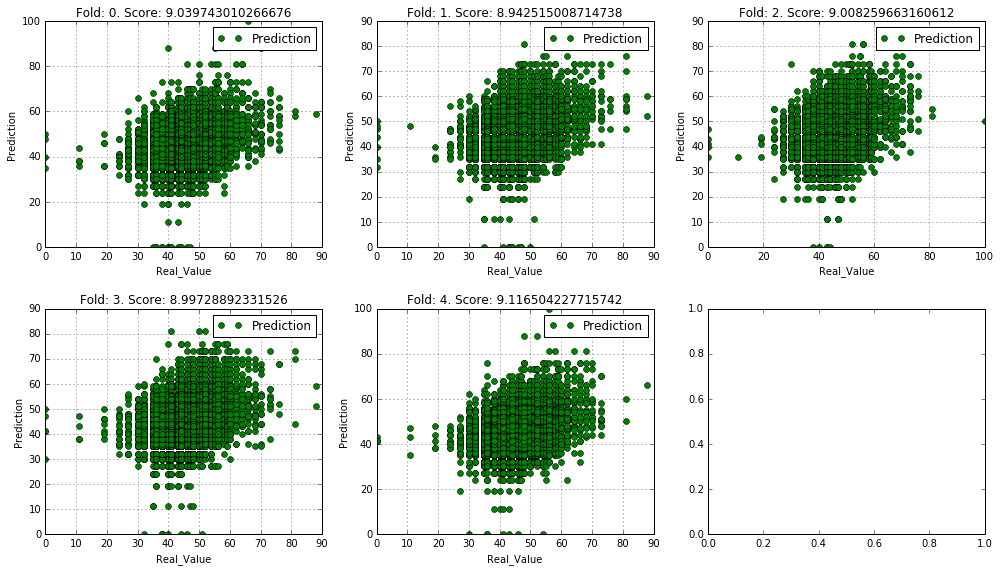

In [20]:
tree = DecisionTreeRegressor()
get_exp_prediction(tree, 3, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle=True)

The Model with the Data raised to the power of 3 gives:
Mean Score: 9.060410384


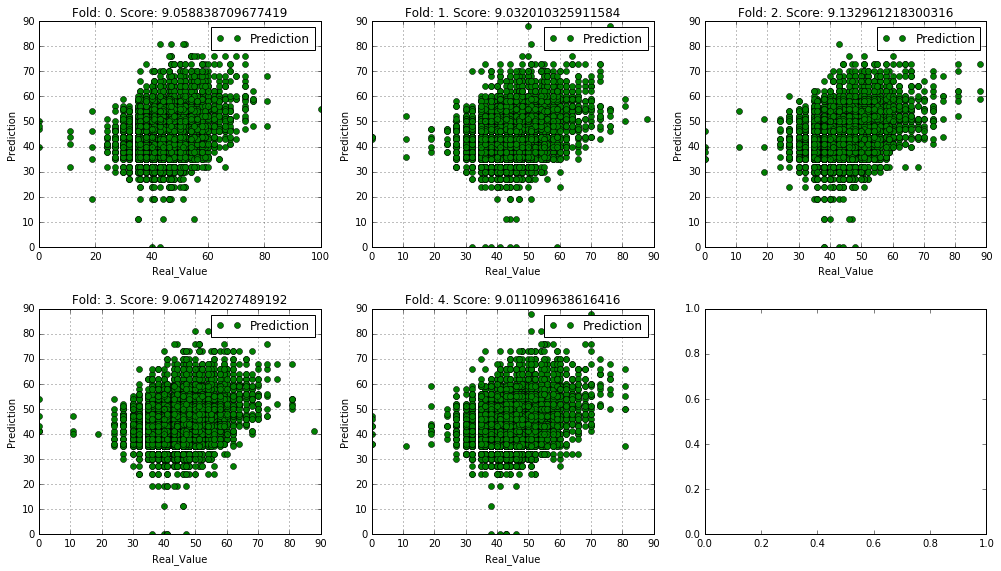

In [21]:
tree = DecisionTreeRegressor()
get_exp_prediction(tree, 3, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split=True)

### Polynomial Features
degree = 2

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 8.60893477454
The prediction took: 415.1168806552887 seconds


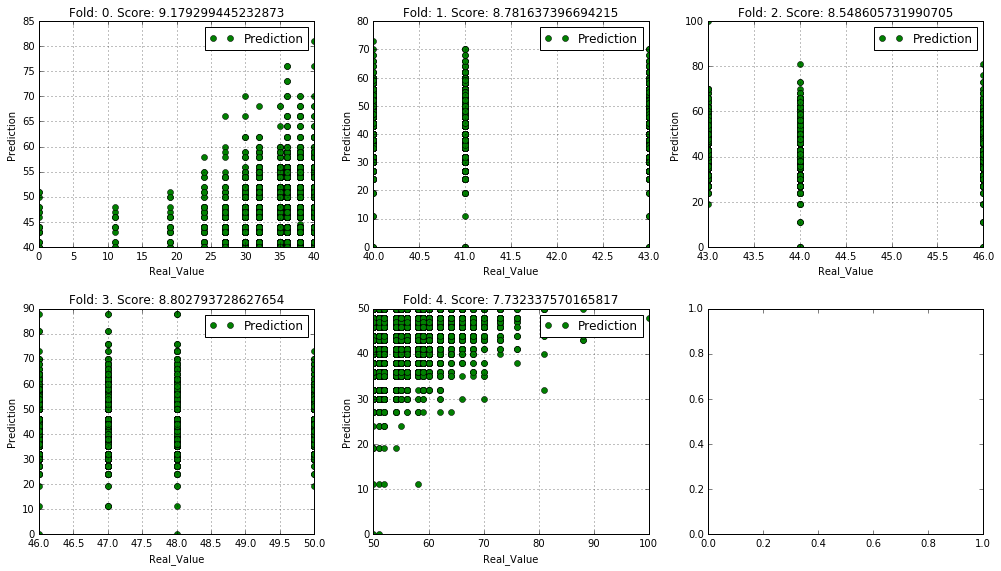

In [22]:
tree = DecisionTreeRegressor()
get_Poly_prediction(tree, 2, S_data, 'PUNT_BIOLOGIA', 5)

In [ ]:
tree = DecisionTreeRegressor()
get_Poly_prediction(tree, 2, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle=True)

The Model with the new "PolyData" with degree 2 gives:


In [ ]:
tree = DecisionTreeRegressor()
get_Poly_prediction(tree, 2, S_data, 'PUNT_BIOLOGIA', 5, shu=True)

The Model with the new "PolyData" with degree 2 gives:
